## Question 1
*Why Gaussian form of the likelihood is a sensible choice? What does it mean that we have chosen a spherical covariance matrix for the likelihood?*

The Gaussian form is sensible because we assume that our input data is normally distributed, and in the real world this is often the case. The Central Limit Theorem states that the input is sufficiently large, the random variables become normally distributed.

A spherical covariance matrix means that a variable does not depend on any other variable but itself.

## Question 2
*If we do not assume that the data points are independent how would the likelihood look then? Remember that Y = [y1, . . . , yN ]*

\begin{align}
p(\mathbf{y}_i \mid f,X) ∼ \mathcal{N}(f(\mathbf{x}_i), \sigma^2\Sigma)
\end{align}


## Question 3
*What is the form of the likelihood above, complete the right-hand side of the expression.*

\begin{align}
p(Y \mid X,W) = \prod_{n=1}^N \mathcal{N}(y_n \mid \mathbf{w}^T \phi (\mathbf{x}_n))
\end{align}

## Question 4
*Explain the concept of conjugate distributions. Why is this a motivated choice?*

The conjugate prior leads to posterior distributions having the same functional form as the prior. So for example, if the likelihood function is a Gaussian, choosing a prior that is also a Gaussian distribution will result in a posterior distribution that is Gaussian. This leads to a convenient solution and a simplified expression of the posterior.

## Question 5
*The prior in Eq.?? is a spherical Gaussian. This means that the “preference” is
encoded in terms of a L2 distance in the space of the parameters. With this view, how would the
preference change if the preference was rather encoded using a L1 norm? Compare and discuss
the different type of solutions these two priors would encode.*

An L1 norm means a cubic Gaussian. It leads to a sparse solution where parameters drop toward zero.

## Question 6
*Derive the posterior over the parameters. Please, do these calculations by hand
as it is very good practice. However, in order to pass the assignment you only need to outline
the calculation and highlight the important steps. For simplicity, please make derivations for a
single output variable y. Otherwise, you would have to apply vectorization techniques.*

- *Why does it have the form that it does?*
- *What is the effect of the constant Z, are we interested in this?*


### Posterior: 

\begin{align}
p(\mathbf{w} \mid \mathbf{X}, \mathbf{t}) = \mathcal{N} (\mathbf{\mu_w, \Sigma_w})
\end{align}
where $\mathbf{\mu_w}$ is the mean of $\mathbf{w}$ and $\Sigma_w$ is the covariance matrix.

\begin{align}
p(\mathbf{w} \mid \mathbf{X, t}) ~ e^{-\frac{1}{2} ( \mathbf{w - \mu_w} )^T \Sigma_w (w - \mu_w)}
=
e^{-\frac{1}{2} \mathbf{w^T}\Sigma_w^{-1} \mathbf{w}} * e^{\mathbf{w^T}\Sigma_w^{-1} \mathbf{\mu_w}} * e^{-\frac{1}{2} \mathbf{\mu_w^T} \Sigma^{-1} \mathbf{\mu_w}}
\end{align}



### Likelihood

\begin{align}
p(\mathbf{t} \mid \mathbf{w, X}) = \mathcal{N} (\mathbf{X_w, \sigma^2*I_N})
\end{align}

\begin{align}
p(\mathbf{w} \mid \mathbf{X, t}) \propto p(\mathbf{X,t} \mid \mathbf{w}) * p(\mathbf{w}) = e^{-\frac{1}{2\sigma^2}( \mathbf{t - Xw})^T(\mathbf{t - Xw})} * e^{-\frac{1}{2} \mathbf{w}^T \Sigma^{-1} \mathbf{w}}
\end{align}



The exponent is:
\begin{align}
-\frac{1}{2\sigma^2}(\mathbf{t - Xw})^T(\mathbf{t - Xw}) - \frac{1}{2} \mathbf{w}^T \Sigma^{-1} \mathbf{w}
= -\frac{1}{2\sigma^2} \mathbf{t^Tt} + \frac{1}{\sigma^2} \mathbf{t^TXw} - \frac{1}{2\sigma^2} \mathbf{{Xw}^TXw} - \frac{1}{2} \mathbf{w^T \Sigma^{-1} w}
\end{align}

Three terms:
1. $-\frac{1}{2\sigma^2}\mathbf{t^Tt}$ (constant to w)
2. $\frac{1}{\sigma^2} \mathbf{t^TXw} = \frac{1}{\sigma^2}\mathbf{w^TX^Tt}$ (linear to w)
3. $-\frac{1}{2 \sigma^2} \mathbf{({Xw})^TXw} = -\frac{1}{2}\mathbf{w^T\Sigma^{-1}w} = -\frac{1}{2}\mathbf{w^T}(\frac{1}{\sigma^2}\mathbf{X^TX + \Sigma^{-1})w}$ (quadratic to w)

Comparing against the posterior quadratic term, we get:
    
$-\frac{1}{2}\mathbf{w^T}(\frac{1}{\sigma^2}\mathbf{X^TX + \Sigma^{-1}}) = \mathbf{w^T}\Sigma_w^{-1}
\implies \frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1} = \Sigma_w^{-1}$

Comparing linear terms:
    
$\frac{1}{\sigma^2}\mathbf{w^TX^Tt}$ and $\mathbf{w^T} \Sigma_\mathbf{w}^{-1} \mu_\mathbf{w}$

Replacing $\Sigma_\mathbf{w}^{-1}$ we get:
$\mathbf{w^T} (\frac{1}{\sigma^2} \mathbf{X^TX} + \Sigma^{-1}) \mu_\mathbf{w}$
$\implies \mu_\mathbf{w} = \frac{1}{\sigma^2}(\frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})^{-1} \mathbf{X^T t}$

Finally we get:

\begin{align}
p(\mathbf{w \mid X, t}) = \mathcal{N} (\frac{1}{\sigma^2}(\frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})^{-1} \mathbf{X^T t}, \frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})
\end{align}

The effect of the constant Z is to normalize the probabilities so that they sum to 1.

## Question 7
*What is a non-parametric model and what is the difference between non-parametrics
and parametrics? In specific discuss these two aspects of non-parametrics:*

- *Representability?*
- *Interpretability?*



In contrast to the non-parametric model, the parametric model assumes a specific form of distribution. This can be represented by variables such as the mean and variance. Parametric models are easier to interpret, but might lead to a model that does a poor job of representing the data. Non-parametric models make assumptions about the form of the distribution.

## Question 8
*Explain what this prior does? Why is it a sensible choice? Use images to show
your reasoning. Clue: use the marginal distribution to explain the prior*

The covariance function says that for similar values of $\mathbf{x}$, the output $\mathcal{f}$ will be similar.

In [232]:
%matplotlib inline  

import pylab as pl
import numpy as np
from numpy import dot
from numpy.linalg import inv
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# To sample from a multivariate Gaussian
#f = np.random.multivariate_normal(mu, K);
# To compute a distance matrix between two sets of vectors
#D = cdist(x1, x2)
# To compute the exponetial of all elements in a matrix
#E = np.exp(D)

## Question 11
***
1. Visualise the prior distribution over W.
1. Pick a single data-point from the data and visualise the posterior distribution over W.
1. Sample from the posterior and show a couple of functions.
1. Repeat 2 − 3 by adding additional data points.

Describe the plots and the behavior when adding more data? Is this a desirable behavior?
***

The prior distribution over $\mathbf{W}$ is:
$$p(\mathbf{W}) = \mathcal{N}(W_0, \tau^2\mathbf{I})$$

We have no prior information about the mean and covariance, so we can set $\mathbf{\mu} = [0, 0]$ as it is convenient, and we can assume a large variance, $\Sigma = [[100, 0], [0, 100]]$, illustrated by the following plots.

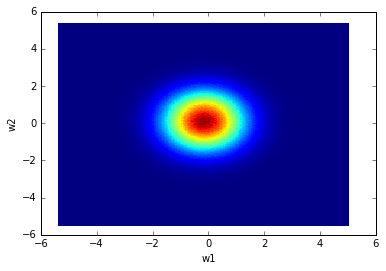

In [1005]:
mu = [0, 0]
K = [[1, 0], [0, 1]]
wPrior = np.random.multivariate_normal(mu, K, 10000000)
fig = visualize(wPrior)#, True, -20, 20, -20, 20)
plt.xlabel('w1')
plt.ylabel('w2')

In [1006]:
x = np.linspace(-1, 1, 21)
w = np.array([-1.3, 0.5])

In [1007]:
def get_y(X, W, epsilon=None):
    if epsilon is None:
        epsilon = np.random.normal(0, 0.3, len(X))
    return np.dot(X, W.T)# + epsilon

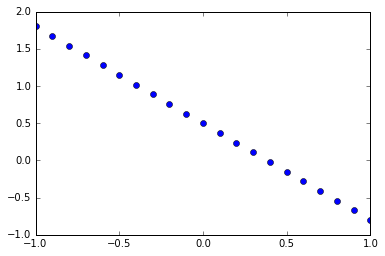

In [1008]:
X = np.ones((len(x), 2))
W = w
X[:,0] = x
Y = get_y(X, W)
plt.plot(x,Y,'o')

In [1013]:
def visualize(distribution, nbins=200):
    H, xedges, yedges = np.histogram2d(distribution[:,0], distribution[:,1], bins=nbins)
    plt.pcolormesh(xedges, yedges, H)

In [1014]:
def get_posterior_mean(X, Y, sigma, cov):
    return 1./(sigma**2) * dot(inv(1./(sigma**2) * dot(X.T, X) + inv(cov)), np.dot(X.T, Y))

In [1015]:
def get_posterior_sigma(X, sigma, cov):
    return inv(1./(sigma**2) * dot(X.T, X) + inv(cov))

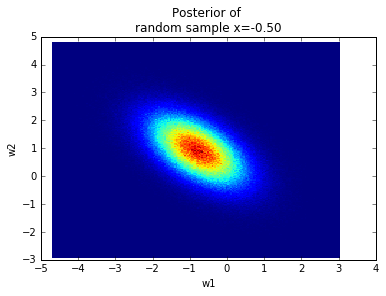

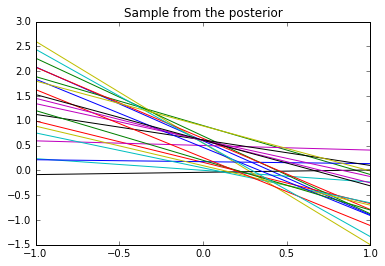

In [1025]:
idx = 5
sample = X[idx]
label = np.array(Y[idx])
sigma = 1
cov = np.eye(2)
posterior_mean = get_posterior_mean(sample, label, sigma, cov)
posterior_sigma = get_posterior_sigma(sample, sigma, cov)
dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)
visualize(dist)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of \nrandom sample x=%.2f' % (sample[0]))
plt.show()

posterior_sample = f[np.random.randint(0, f.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.show()

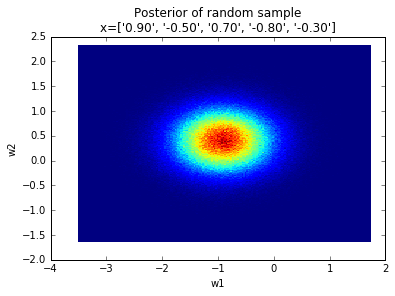

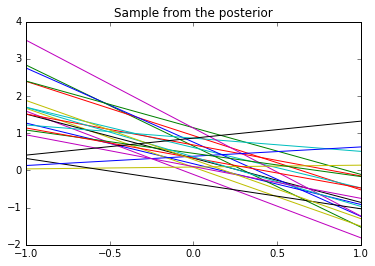

In [1028]:
shuffled_idx = np.random.permutation(len(X))
idx = shuffled_idx[:5]
samples = X[idx]
labels = np.array(Y[idx])
sigma = 1
cov = np.eye(2)
posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
posterior_sigma = get_posterior_sigma(samples, sigma, cov)
f = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)

visualize(f)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of random sample\nx=%s' % (['%.2f' % sample[0] for sample in samples]))
plt.show()

posterior_sample = f[np.random.randint(0, f.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.show()

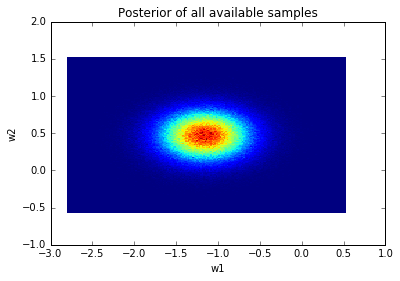

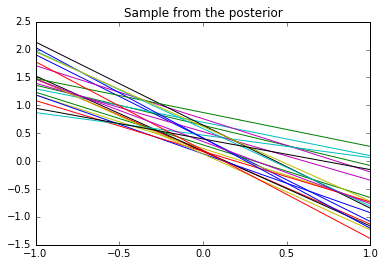

In [1033]:
#ax1 = plt.subplot(121, aspect='equal', adjustable='box-forced')

idx = shuffled_idx[:21]
samples = X[idx]
labels = np.array(Y[idx])
sigma = 1
cov = np.eye(2)
posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
posterior_sigma = get_posterior_sigma(samples, sigma, cov)
f = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)
visualize(f)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of all available samples')
plt.show()

posterior_sample = f[np.random.randint(0, f.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.show()